# Bank data analysis (Long term bank deposit)

The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  
Make feature engineering but also try differnet models in order to get as much accuracy as possible.


1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [1]:
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv('dataset.csv', sep=';', header=0)
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns")
for column in df.columns:
    if is_numeric_dtype(df[column]):
        print(column)
print("----------------------------------")        
print("Category columns")        
for column in df.columns:
    if is_string_dtype(df[column]):
        print(column)

Numeric columns
age
duration
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
----------------------------------
Category columns
job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


In [4]:
missing = df.isnull().sum()
print(missing)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
X = df.drop("y", axis=1)
y = df['y']

In [6]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [7]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [8]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Explanatory Data Analysis - EDA

## Univariate Analysis

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
# Output variable
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Text(0.5, 1.0, 'Class')

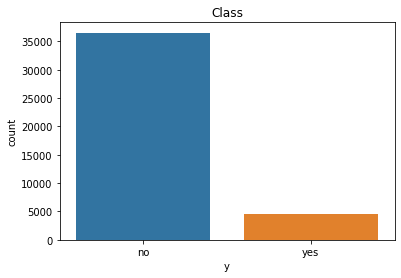

In [11]:
ax = sns.countplot(df['y'])
ax.set_title('Class')

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

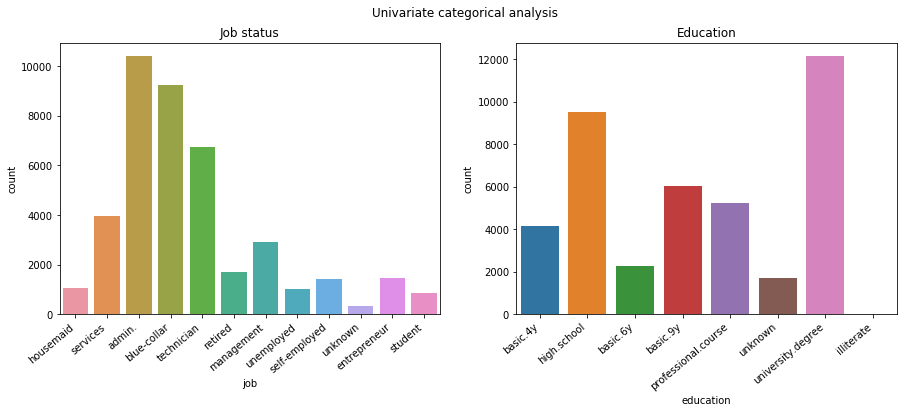

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Univariate categorical analysis')

ax = sns.countplot(ax = axes[0], x = df.job)
axes[0].set_title('Job status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax2 = sns.countplot(ax = axes[1],x = df.education)
axes[1].set_title('Education')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

Text(0.5, 1.0, 'Marital Status')

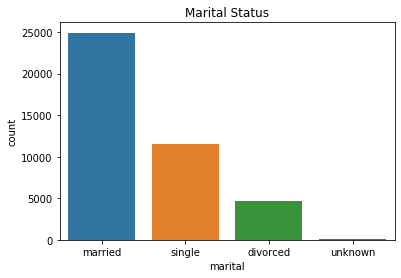

In [13]:
sns.countplot(x = df.marital).set_title('Marital Status')

Text(0.5, 1.0, 'Loan in Default')

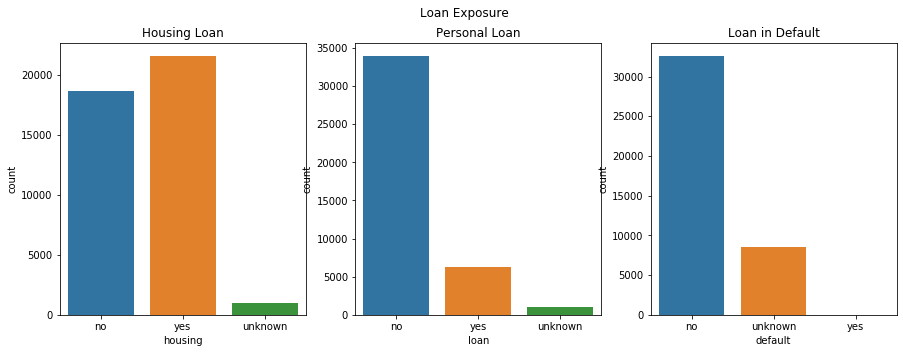

In [14]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
fig.suptitle('Loan Exposure')

ax = sns.countplot(ax = axes[0], x = df.housing)
axes[0].set_title('Housing Loan')

sns.countplot(ax = axes[1], x = df.loan)
axes[1].set_title('Personal Loan')

sns.countplot(ax = axes[2], x = df.default)
axes[2].set_title('Loan in Default')


Text(0.5, 1.0, 'Last contact day of the week')

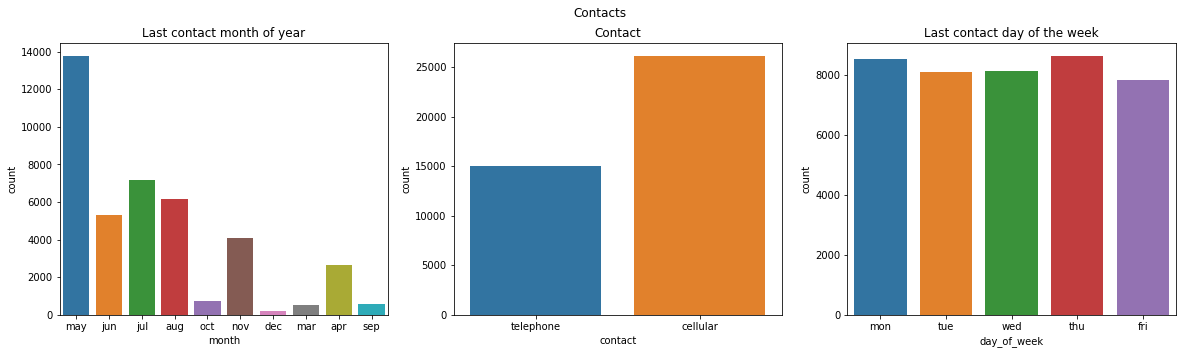

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Contacts')

ax = sns.countplot(ax = axes[0], x = df.month)
axes[0].set_title('Last contact month of year')
sns.countplot(ax = axes[1], x = df.contact)
axes[1].set_title('Contact')
sns.countplot(ax = axes[2], x = df.day_of_week)
axes[2].set_title('Last contact day of the week')

Text(0.5, 1.0, 'Number of previous contacts')

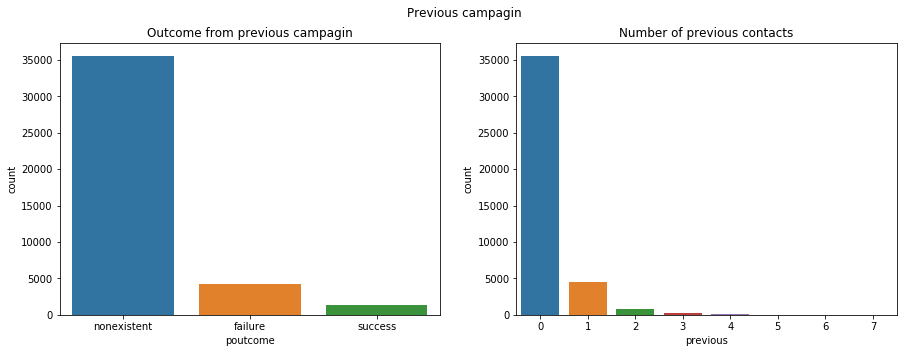

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Previous campagin')

plt.subplot(121)
sns.countplot(df['poutcome']).set_title('Outcome from previous campagin')

plt.subplot(122)
sns.countplot(df['previous']).set_title('Number of previous contacts')




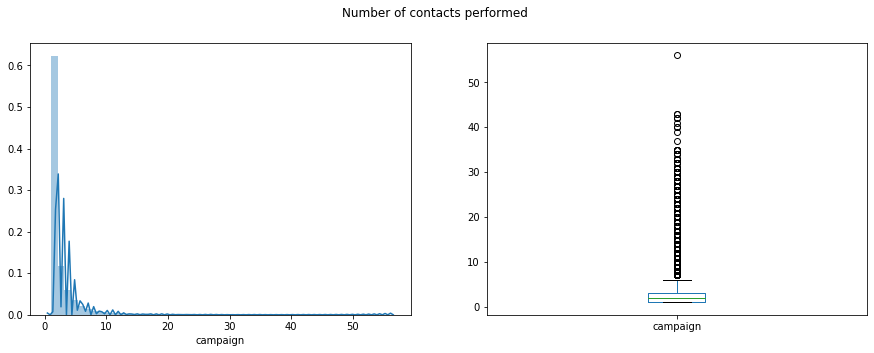

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Number of contacts performed')

plt.subplot(121)
sns.distplot(df['campaign'])

plt.subplot(122)
df['campaign'].plot(kind='box')

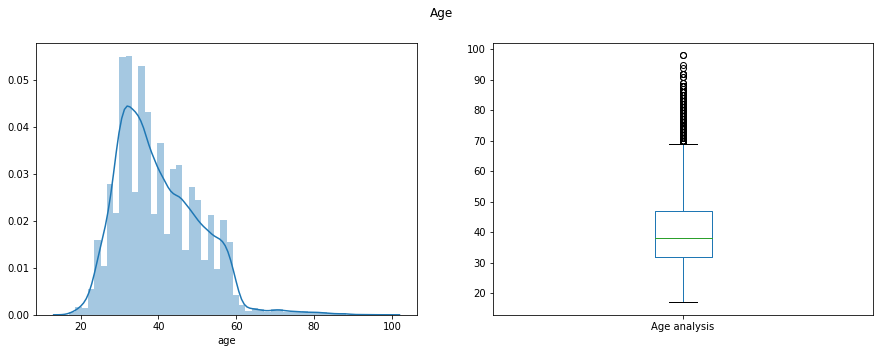

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Age')

plt.subplot(121)
sns.distplot(df['age'], label='Age')

plt.subplot(122)
df['age'].plot(kind='box', label="Age analysis")

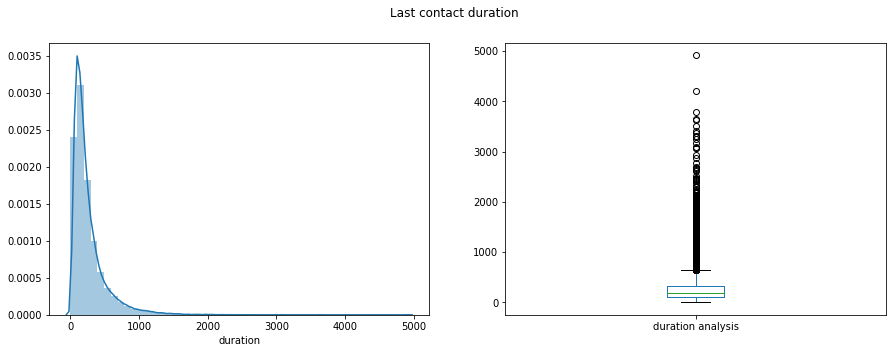

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Last contact duration')

plt.subplot(121)
sns.distplot(df['duration'], label='duration')

plt.subplot(122)
df['duration'].plot(kind='box', label="duration analysis")

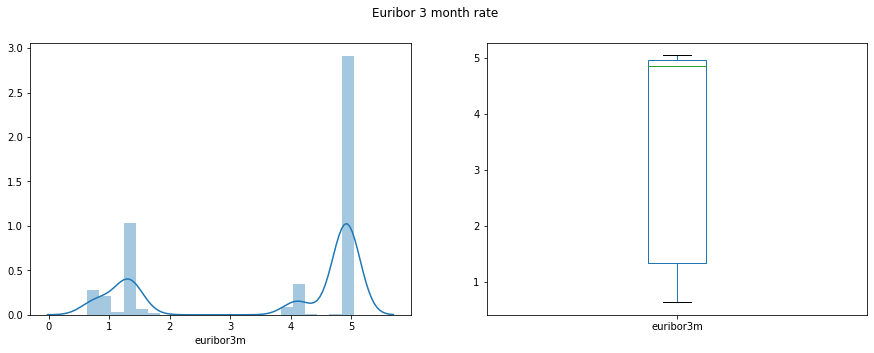

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Euribor 3 month rate')

plt.subplot(121)
sns.distplot(df['euribor3m'], label='euribor3m')

plt.subplot(122)
df['euribor3m'].plot(kind='box', label="euribor3m")

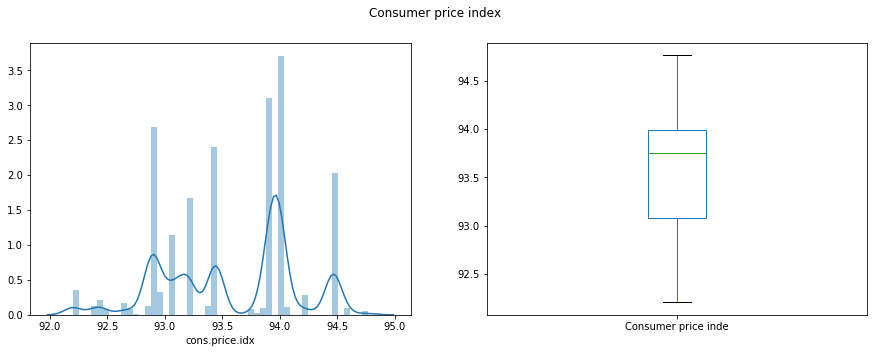

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Consumer price index')

plt.subplot(121)
sns.distplot(df['cons.price.idx'], label='Consumer price inde')

plt.subplot(122)
df['cons.price.idx'].plot(kind='box', label="Consumer price inde")

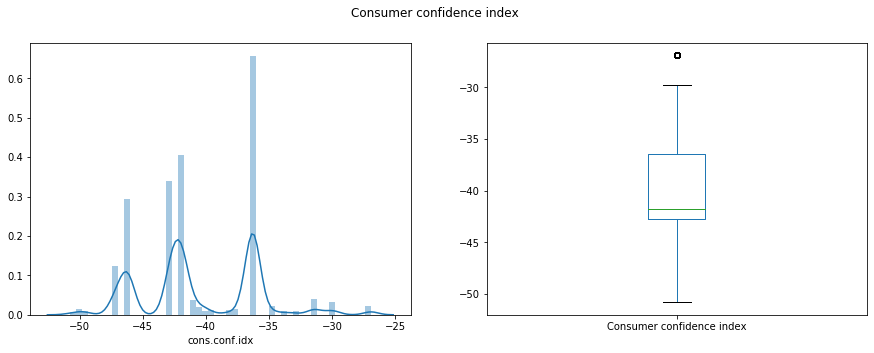

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Consumer confidence index')

plt.subplot(121)
sns.distplot(df['cons.conf.idx'], label='Consumer confidence index')

plt.subplot(122)
df['cons.conf.idx'].plot(kind='box', label="Consumer confidence index")

## Bivariate Analysis

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

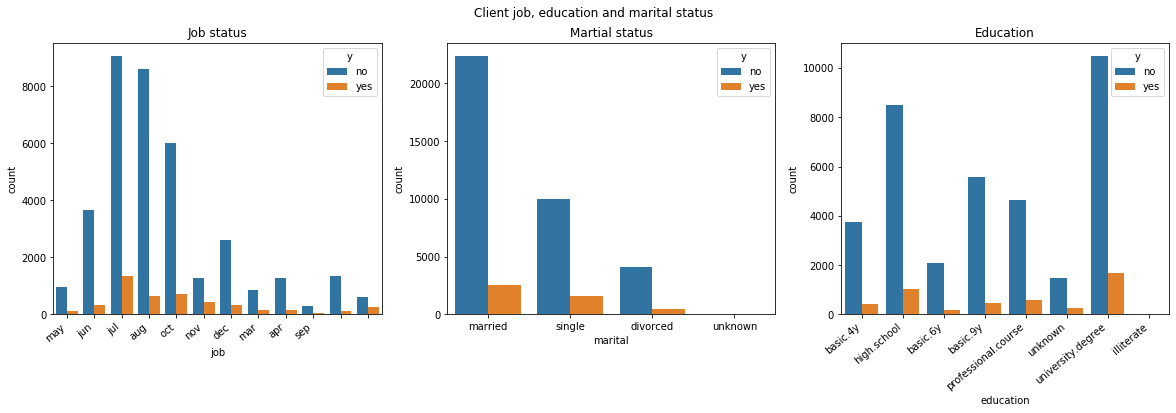

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Client job, education and marital status')

ax1 = sns.countplot(ax = axes[0], x = df.job, hue='y', data = df)
axes[0].set_title('Job status')
axes[0].set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = sns.countplot(ax = axes[1], x = df.marital, hue='y', data = df)
axes[1].set_title('Martial status')
ax3 = sns.countplot(ax = axes[2], x = df.education, hue='y', data = df)
axes[2].set_title('Education')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

Text(0.5, 1.0, 'Personal Loan')

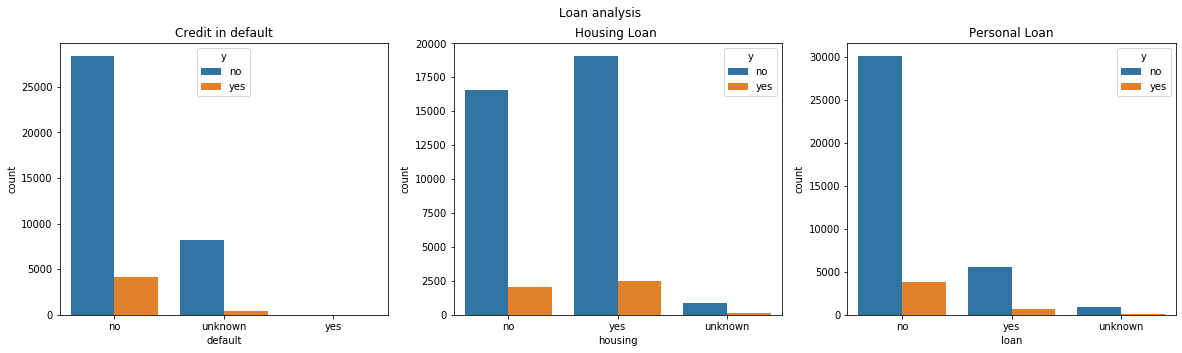

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Loan analysis')

ax1 = sns.countplot(ax = axes[0], x = df.default, hue='y', data = df)
axes[0].set_title('Credit in default')
ax2 = sns.countplot(ax = axes[1], x = df.housing, hue='y', data = df)
axes[1].set_title('Housing Loan ')
ax3_3 = sns.countplot(ax = axes[2], x = df.loan, hue='y', data = df)
axes[2].set_title('Personal Loan')


Text(0.5, 1.0, 'Last contact -  Day od week ')

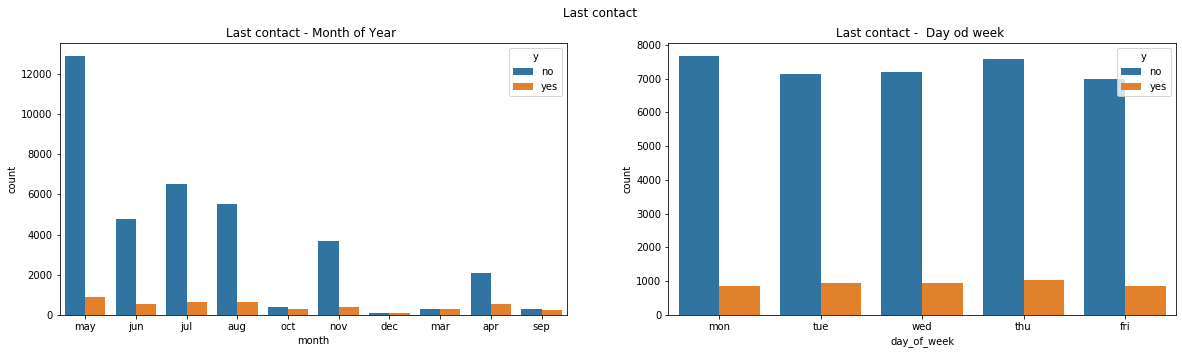

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Last contact')

ax1 = sns.countplot(ax = axes[0], x = df.month, hue='y', data = df)
axes[0].set_title('Last contact - Month of Year ')

ax2 = sns.countplot(ax = axes[1], x = df.day_of_week, hue='y', data = df)
axes[1].set_title('Last contact -  Day od week ')

Text(0.5, 1.0, 'Number of previous contacts')

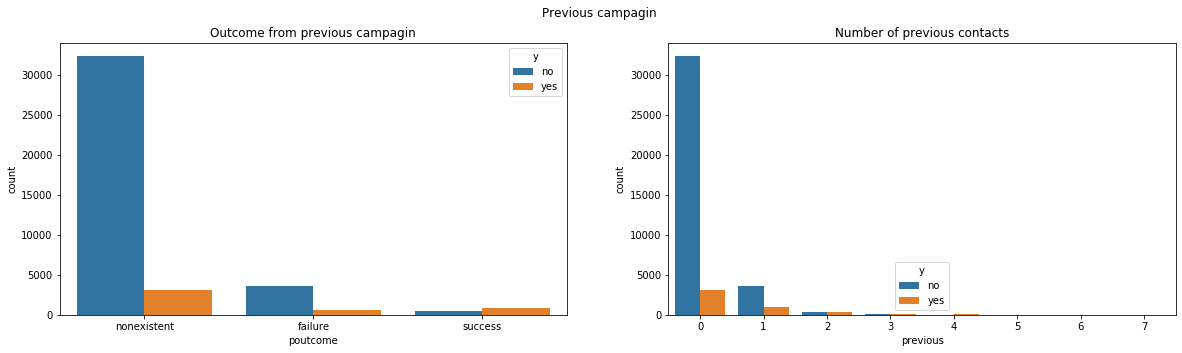

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Previous campagin')

ax1 = sns.countplot(ax = axes[0], x = df.poutcome, hue='y', data = df)
axes[0].set_title('Outcome from previous campagin')

ax2 = sns.countplot(ax = axes[1], x = df.previous, hue='y', data = df)
axes[1].set_title('Number of previous contacts')

Text(0.5, 1.0, 'Number of contacts performed no class')

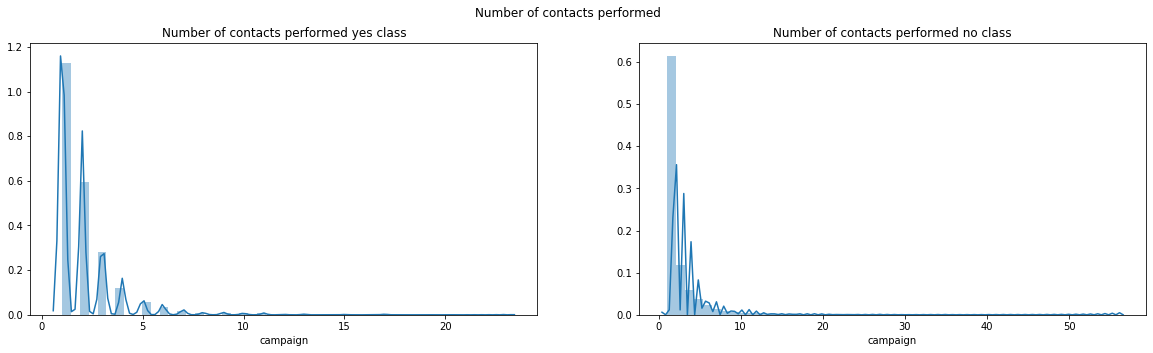

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Number of contacts performed ')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['campaign']).set_title('Number of contacts performed yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['campaign']).set_title('Number of contacts performed no class')



Text(0.5, 1.0, 'Euribor no class')

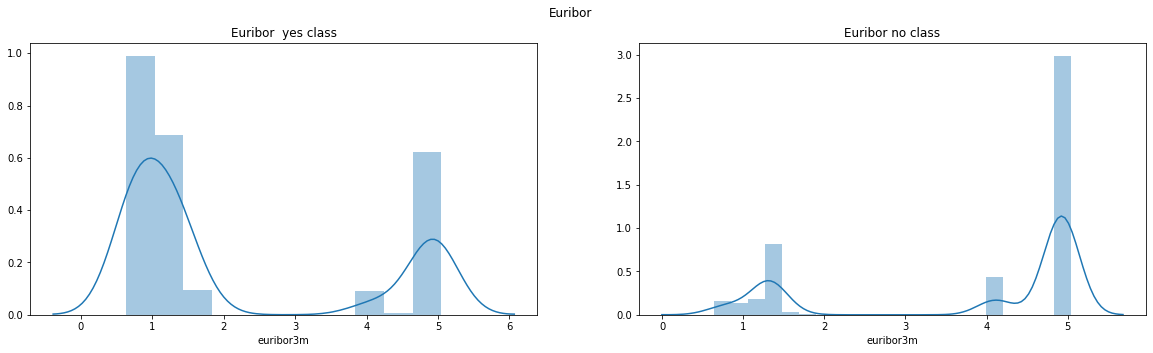

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Euribor')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['euribor3m']).set_title('Euribor  yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['euribor3m']).set_title('Euribor no class')



Text(0.5, 1.0, 'Consumer confidence index no class')

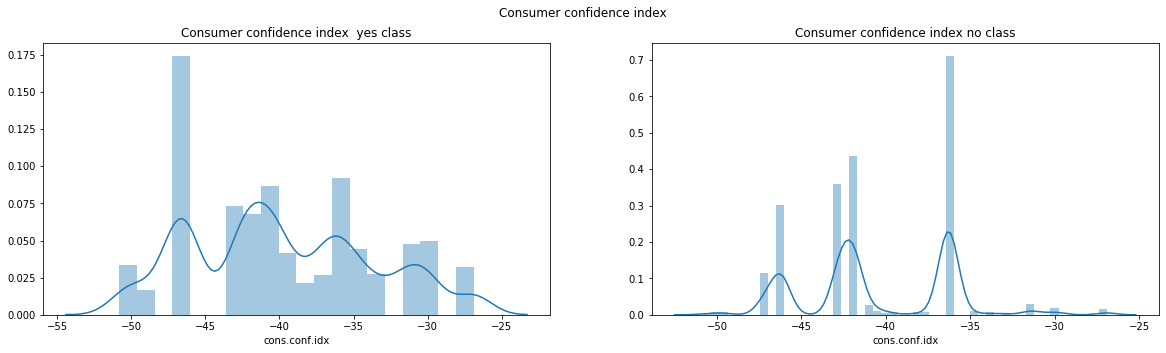

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Consumer confidence index')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['cons.conf.idx']).set_title('Consumer confidence index  yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['cons.conf.idx']).set_title('Consumer confidence index no class')





Text(0.5, 1.0, 'Consumer price index no class')

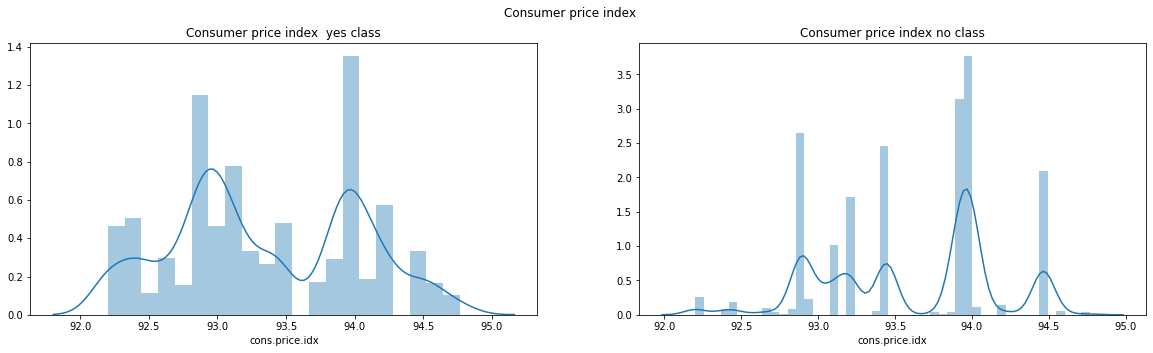

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Consumer price index')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['cons.price.idx']).set_title('Consumer price index  yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['cons.price.idx']).set_title('Consumer price index no class')


## 1. Data preprocessing, normalization, missing data, categorical data

# Missing data (unknown)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [32]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [33]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [34]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [35]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [36]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [37]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [38]:
df = df.replace('unknown', np.nan)

In [39]:
df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [40]:
df.dropna(subset = ["job"], inplace=True) #gi izbrisav redovite so unknown values bidejki se rabotese za 330 od 41000+ redovi

In [41]:
df.dropna(subset = ["marital"], inplace=True) #gi izbrisav redovite so unknown values bidejki se rabotese za 80 od 41000+ redovi

In [42]:
df.dropna(subset = ["housing"], inplace=True) #gi izbrisav redovite so unknown values bidejki se rabotese za 990 od 41000+ redovi

In [43]:
df.dropna(subset = ["loan"], inplace=True) #gi izbrisav redovite so unknown values bidejki se rabotese za 990 od 41000+ redovi

In [44]:
df #izgubiv 2000 podatoci so site brisenja ili okolu 4,7% sto mislam deka e prifatlivo 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [45]:
mapping = {'yes': 0, 'no': 1}
df = df.assign(default_numerized=df['default'].replace(mapping))
df.default_numerized.unique() #pretvoram od kategoriski vo numericki za da mozam da napravam KNN za praznite mesta 
# - ova moze i vo category encoding ama ima i missing values

array([ 1., nan,  0.])

In [46]:
mapping = {'university.degree': 0, 'high.school': 1, 'basic.9y': 2, 'professional.course': 3, 'basic.4y': 4, 'basic.6y':5,
          'illiterate':6}
df = df.assign(education_numerized=df['education'].replace(mapping))
df.education_numerized.unique() #pretvoram od kategoriski vo numericki za da mozam da napravam KNN za praznite mesta
# - ova moze i vo category encoding ama ima i missing values

array([ 4.,  1.,  5.,  2.,  3., nan,  0.,  6.])

In [47]:
df.drop(['education','default'], inplace=True, axis = 'columns')

In [48]:
df.head(10)

,age,job,marital,housing,loan,contact,month,day_of_week,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_numerized,education_numerized
0,56,housemaid,married,no,no,telephone,may,mon,261,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,4.0
1,57,services,married,no,no,telephone,may,mon,149,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,1.0
2,37,services,married,yes,no,telephone,may,mon,226,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,1.0
3,40,admin.,married,no,no,telephone,may,mon,151,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,5.0
4,56,services,married,no,yes,telephone,may,mon,307,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,1.0
5,45,services,married,no,no,telephone,may,mon,198,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,2.0
6,59,admin.,married,no,no,telephone,may,mon,139,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,3.0
7,41,blue-collar,married,no,no,telephone,may,mon,217,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
8,24,technician,single,yes,no,telephone,may,mon,380,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,3.0
9,25,services,single,yes,no,telephone,may,mon,50,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,1.0


In [49]:
#df.drop(['default_numerized'], inplace=True, axis = 'columns') - edna opcija e da ja izbrisime cela default kolona odnosno
#default_numerized posto ima samo 3 yes i mnogu unknowns, ne ni dava nikakvo info

In [50]:
from sklearn.impute import KNNImputer

transformer = KNNImputer(n_neighbors=2)

columns = ['default_numerized', 'education_numerized']

df[columns] = transformer.fit_transform(df[columns])

In [51]:
df.head(10)

,age,job,marital,housing,loan,contact,month,day_of_week,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_numerized,education_numerized
0,56,housemaid,married,no,no,telephone,may,mon,261,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.000000,4.000000
1,57,services,married,no,no,telephone,may,mon,149,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.000000,1.000000
2,37,services,married,yes,no,telephone,may,mon,226,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.000000,1.000000
3,40,admin.,married,no,no,telephone,may,mon,151,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.000000,5.000000
4,56,services,married,no,yes,telephone,may,mon,307,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.000000,1.000000
5,45,services,married,no,no,telephone,may,mon,198,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.000000,2.000000
6,59,admin.,married,no,no,telephone,may,mon,139,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.000000,3.000000
7,41,blue-collar,married,no,no,telephone,may,mon,217,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.999905,1.657524
8,24,technician,single,yes,no,telephone,may,mon,380,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.000000,3.000000
9,25,services,single,yes,no,telephone,may,mon,50,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.000000,1.000000


In [52]:
df['pdays'].value_counts()

999    38347
3        421
6        396
4        113
9         62
2         58
7         58
12        56
10        48
5         46
13        35
11        27
1         25
15        24
14        20
8         15
0         15
16        10
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [53]:
df.drop(['pdays'], inplace=True, axis = 'columns') #ja izbrisav kolonata bidejki 999 means client was not previously contacted
#a imame 38347 nekontaktirani so sto ni ostanuvaat samo 3000 podatoci - ova treba vo feature selection da go prefrlam 

# Scaling

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39803 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  39803 non-null  int64  
 1   job                  39803 non-null  object 
 2   marital              39803 non-null  object 
 3   housing              39803 non-null  object 
 4   loan                 39803 non-null  object 
 5   contact              39803 non-null  object 
 6   month                39803 non-null  object 
 7   day_of_week          39803 non-null  object 
 8   duration             39803 non-null  int64  
 9   campaign             39803 non-null  int64  
 10  previous             39803 non-null  int64  
 11  poutcome             39803 non-null  object 
 12  emp.var.rate         39803 non-null  float64
 13  cons.price.idx       39803 non-null  float64
 14  cons.conf.idx        39803 non-null  float64
 15  euribor3m            39803 non-null 

In [55]:
from sklearn.preprocessing import StandardScaler

columns = ['age','duration']

transformer = StandardScaler()

df[columns] = transformer.fit_transform(df[columns]) #imaat prilicno simetricna raspredelba zatoa koristam standardizacija

In [56]:
from sklearn.preprocessing import MinMaxScaler

columns = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

scaler = MinMaxScaler() 

df[columns] = scaler.fit_transform(df[columns])

In [63]:
df

,age,job,marital,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_numerized,education_numerized
0,1.539987,housemaid,married,no,no,telephone,may,mon,0.009489,1,0,nonexistent,0.937500,0.698753,0.60251,0.957379,0.859735,no,1.0,4.0
1,1.636117,services,married,no,no,telephone,may,mon,-0.422339,1,0,nonexistent,0.937500,0.698753,0.60251,0.957379,0.859735,no,1.0,1.0
2,-0.286490,services,married,yes,no,telephone,may,mon,-0.125457,1,0,nonexistent,0.937500,0.698753,0.60251,0.957379,0.859735,no,1.0,1.0
3,0.001901,admin.,married,no,no,telephone,may,mon,-0.414628,1,0,nonexistent,0.937500,0.698753,0.60251,0.957379,0.859735,no,1.0,5.0
4,1.539987,services,married,no,yes,telephone,may,mon,0.186846,1,0,nonexistent,0.937500,0.698753,0.60251,0.957379,0.859735,no,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.174203,retired,married,yes,no,cellular,nov,fri,0.290948,1,0,nonexistent,0.479167,1.000000,0.00000,0.089322,0.000000,yes,1.0,3.0
41184,0.578683,blue-collar,married,no,no,cellular,nov,fri,0.479872,1,0,nonexistent,0.479167,1.000000,0.00000,0.089322,0.000000,no,1.0,3.0
41185,1.539987,retired,married,yes,no,cellular,nov,fri,-0.268115,2,0,nonexistent,0.479167,1.000000,0.00000,0.089322,0.000000,no,1.0,0.0
41186,0.386422,technician,married,no,no,cellular,nov,fri,0.707353,1,0,nonexistent,0.479167,1.000000,0.00000,0.089322,0.000000,yes,1.0,3.0


# Category encoding

# One hot encoding

In [58]:
# import category_encoders as ce

# one_hot_encoding= pd.get_dummies(df[['job','marital','default', 'housing', 'loan', 'poutcome', 'contact', 'education','month',
#                                      'day_of_week']])
# dataset_one_hot1 = pd.concat([df, one_hot_encoding], axis='columns')


In [59]:
# dataset_one_hot1.drop(['job','marital','default', 'housing', 'loan', 'poutcome', 'contact', 'education','month',
#                                      'day_of_week'], axis=1, inplace=True)

In [60]:
# dataset_one_hot1

In [61]:
#cat_features = ['education', 'month', 'day_of_week']

#cat_encoder = ce.CatBoostEncoder(cols=('education', 'month', 'day_of_week'))

#dataset_one_hot1[['education', 'month', 'day_of_week']] = cat_encoder.fit_transform(X[['education', 'month', 'day_of_week']], y)

## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

In [62]:
#corrmat = dataset_one_hot1.corr()
#top_corr_features = corrmat.index

#plt.figure(figsize=(20,10))

#g = sns.heatmap(dataset_one_hot1[top_corr_features].corr(), 
           #     annot=True,
           #     cmap='RdYlGn')

We can exclude those columns which are having absolute correlation greater than 0.95.

## 3. Classification models
- classical classification models
- deep neural networks

## 4. Evaluation and comparisons, various metrics

## 5. Hyperparameter Optimization

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect